In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 30)
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-pastel')

In [2]:
df = pd.read_csv("Cleaned Dataset.csv", parse_dates=['Created_Date'])
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Created_Date
0,1.0,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,1.0,1,1,2.258000e+09,564600,9000000,6800000,108400000,2000000.0,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-03-13
1,2.0,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,50.0,1,1,1.348000e+09,337000,5400000,4000000,64700000,8000000.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,2012-02-20
2,3.0,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2,1,1.975000e+09,493800,7900000,5900000,94800000,1000000.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,2006-09-01
3,4.0,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,3.0,2,2,1.824000e+09,455900,7300000,5500000,87500000,1000000.0,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-09-20
4,5.0,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,5.0,3,3,7.316740e+08,182900,2900000,2200000,35100000,NaN,88.2,328239523,14.70,270663028,37.090240,-95.712891,2015-05-12


In [3]:
df.shape

(973, 26)

In [4]:
# Filling 1 missing value in 'Youtuber' and 'Title' upon Internet research
df['Youtuber'].fillna('Cognizer', inplace=True)
df['Title'].fillna('Cognizer', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   rank                                     973 non-null    float64       
 1   Youtuber                                 973 non-null    object        
 2   subscribers                              973 non-null    int64         
 3   video views                              973 non-null    int64         
 4   category                                 973 non-null    object        
 5   Title                                    973 non-null    object        
 6   uploads                                  973 non-null    int64         
 7   Country                                  973 non-null    object        
 8   Abbreviation                             973 non-null    object        
 9   channel_type                             97

---

### 1. What are the top 10 YouTube channels based on the number of subscribers?

In [6]:
a = df.sort_values('rank').head(10).sort_values('rank', ascending=False)
a.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Created_Date
9,10.0,WWE,96000000,77428473662,Sports,WWE,70127,United States,US,Sports,7.0,5,1,714614000.0,178700,2900000,2100000,34300000,600000.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,2007-05-11
8,9.0,Zee Music Company,96700000,57856289381,Music,Zee Music Company,8548,India,IN,Music,12.0,3,2,803613000.0,200900,3200000,2400000,38600000,1100000.0,28.1,1366417754,5.36,471031528,20.593684,78.962880,2014-03-12
7,8.0,Vlad and Niki,98900000,77180169894,Entertainment,Vlad and Niki,574,United States,US,Entertainment,8.0,4,5,580574000.0,145100,2300000,1700000,27900000,600000.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,2018-04-23
6,7.0,Like Nastya,106000000,90479060027,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,6.0,1,1,48947000.0,12200,195800,146800,2300000,100000.0,81.9,144373535,4.59,107683889,61.524010,105.318756,2016-01-14
5,6.0,PewDiePie,111000000,29058044447,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.0,1,4,39184000.0,9800,156700,117600,1900000,NaN,63.2,126226568,2.29,115782416,36.204824,138.252924,2010-04-29


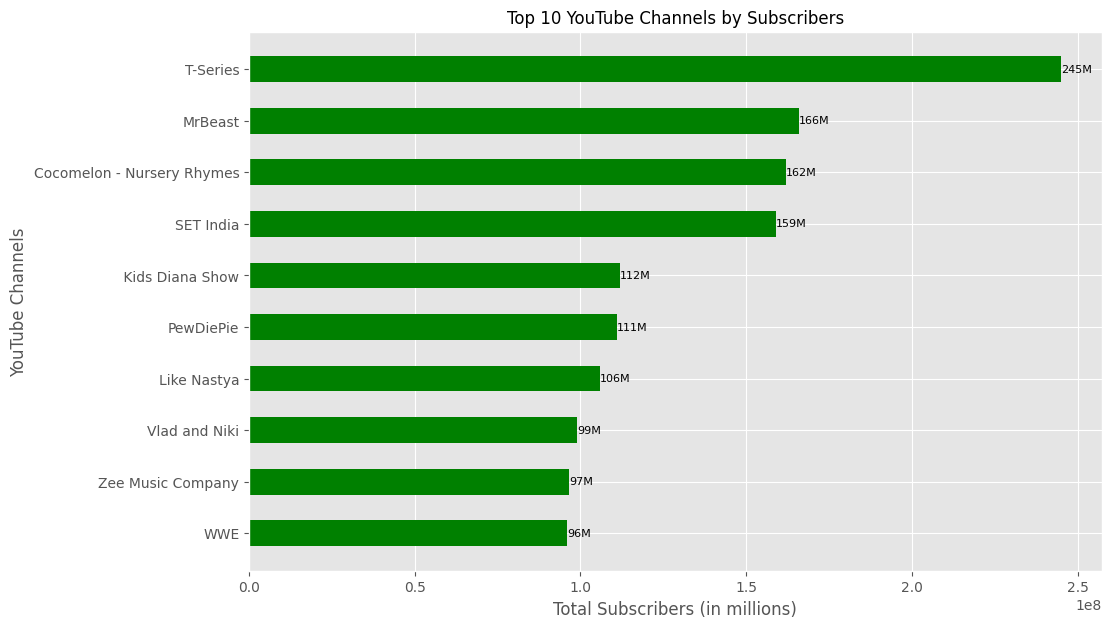

In [7]:
plt.figure(figsize=(11,7))
plt.barh(y=a['Youtuber'], width=a['subscribers'], color='green', height=0.5)
for i,j in enumerate(a['subscribers'].sort_values(ascending=False)):
    plt.text(j, 9-i, f"{round(j/1000000)}M", va='center', fontsize=8, color='black')

plt.xlabel('Total Subscribers (in millions)')
plt.ylabel('YouTube Channels')
plt.title('Top 10 YouTube Channels by Subscribers', fontsize=12)
plt.show()

---

### 2. Which category has the highest average number of subscribers?

In [8]:
df.groupby('category')['subscribers'].mean()

category
Autos & Vehicles         1.785000e+07
Comedy                   2.010429e+07
Education                2.592292e+07
Entertainment            2.175823e+07
Film & Animation         2.356087e+07
Gaming                   2.077449e+07
Howto & Style            1.974737e+07
Movies                   2.565000e+07
Music                    2.616039e+07
News & Politics          2.063077e+07
Nonprofits & Activism    2.775000e+07
People & Blogs           2.036861e+07
Pets & Animals           1.810000e+07
Science & Technology     1.838889e+07
Shows                    4.660000e+07
Sports                   2.619167e+07
Trailers                 3.900000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64

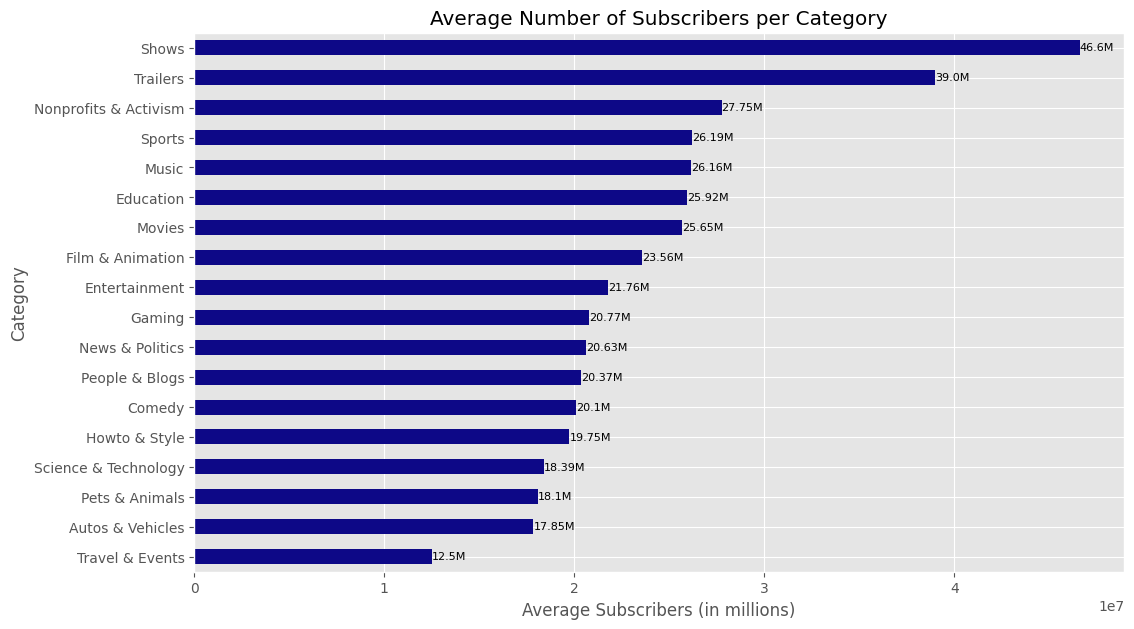

In [9]:
df.groupby('category')['subscribers'].mean().sort_values().plot(kind='barh', 
                                                                title='Average Number of Subscribers per Category', 
                                                                figsize=(12,7), 
                                                                colormap='plasma')

for i,j in enumerate(df.groupby('category')['subscribers'].mean().sort_values(ascending=False).values):
    plt.text(j, 17-i, f"{round(j/1000000, 2)}M", va='center', fontsize=8, color='black')

plt.xlabel('Average Subscribers (in millions)')
plt.ylabel('Category')
plt.show()

---

### 3. How many videos, on average, are uploaded by YouTube channels in each category?

In [10]:
df.groupby('category')['uploads'].mean()

category
Autos & Vehicles           1898.500000
Comedy                     1103.785714
Education                  2957.062500
Entertainment             11536.963855
Film & Animation           2822.130435
Gaming                     4178.693878
Howto & Style              1687.368421
Movies                     3553.000000
Music                      2287.560386
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9021.350365
Pets & Animals             4451.500000
Science & Technology       2025.166667
Shows                     32226.545455
Sports                    13341.500000
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64

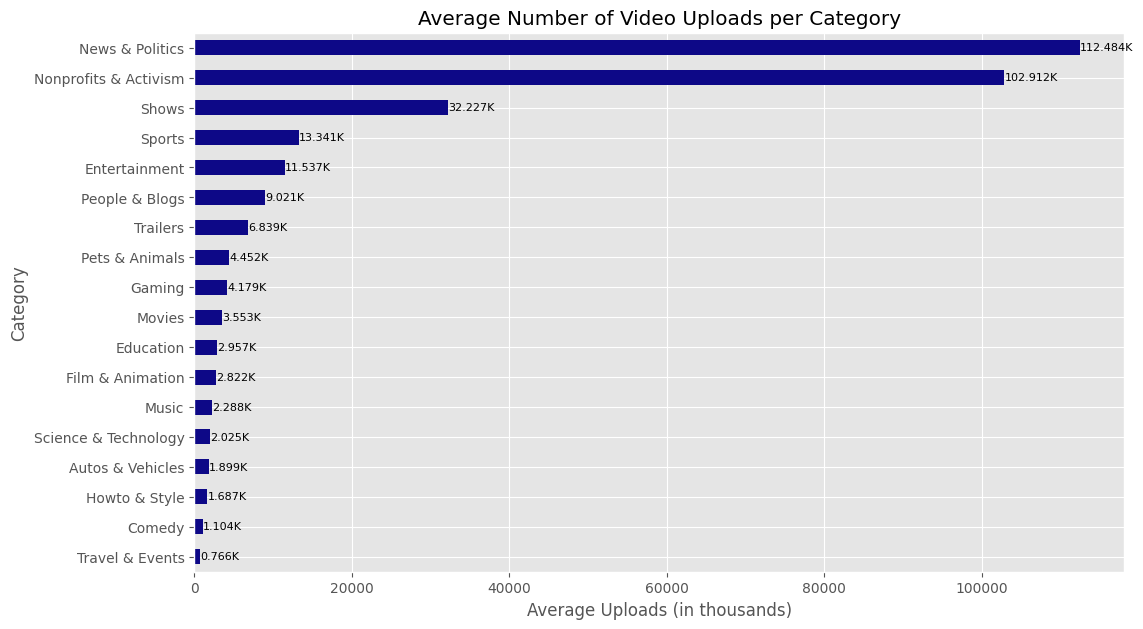

In [11]:
df.groupby('category')['uploads'].mean().sort_values().plot(kind='barh', 
                                                            title='Average Number of Video Uploads per Category', 
                                                            figsize=(12,7), 
                                                            colormap='plasma')

for i,j in enumerate(df.groupby('category')['uploads'].mean().sort_values(ascending=False)):
    plt.text(j, 17-i, f"{round(j/1000, 3)}K", va='center', fontsize=8, color='black')

plt.xlabel('Average Uploads (in thousands)')
plt.ylabel('Category')
plt.show()

---

### 4. What are the top 5 countries with the highest number of YouTube channels?

In [12]:
df.groupby('Country')['Youtuber'].size().sort_values(ascending=False).head()

Country
United States     337
India             200
Brazil             68
United Kingdom     46
Mexico             40
Name: Youtuber, dtype: int64

In [13]:
df['Country'].value_counts().head()

Country
United States     337
India             200
Brazil             68
United Kingdom     46
Mexico             40
Name: count, dtype: int64

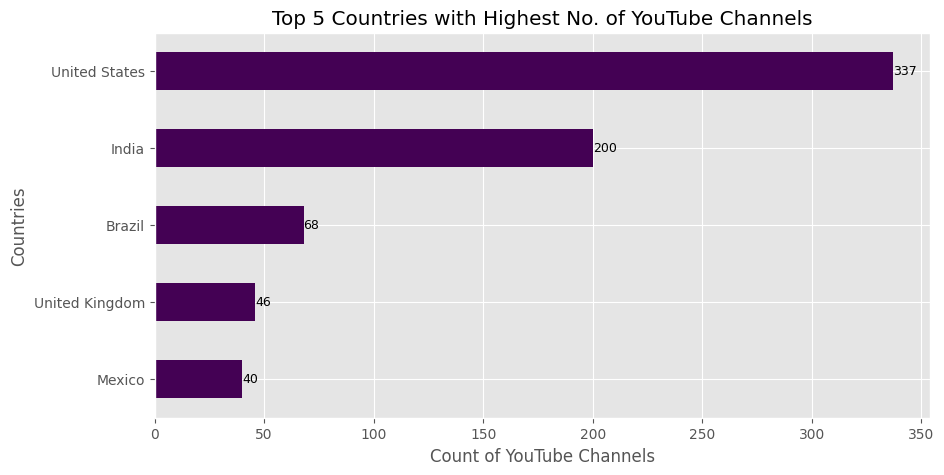

In [14]:
df['Country'].value_counts().head().sort_values().plot(kind='barh', 
                                                       title='Top 5 Countries with Highest No. of YouTube Channels', 
                                                       figsize=(10, 5), 
                                                       colormap='viridis')

for i,j in enumerate(df['Country'].value_counts().head()):
    plt.text(j, 4-i, str(j), va='center', fontsize=9, color='black')

plt.xlabel('Count of YouTube Channels')
plt.ylabel('Countries')
plt.show()

---

### 5. What is the distribution of channel types across different categories?

In [15]:
cross_tab = pd.crosstab(df['channel_type'], df['category'])
cross_tab

category,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Movies,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Trailers,Travel & Events
channel_type,,,,,,,,,,,,,,,,,,
Animals,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0
Autos,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Comedy,0,41,0,5,1,1,0,0,0,0,0,5,0,0,1,0,0,0
Education,0,0,38,2,2,0,0,0,1,0,0,3,0,0,2,0,0,0
Entertainment,1,20,3,187,16,18,7,0,12,3,0,25,1,4,6,1,1,1
Film,0,1,2,6,20,2,0,2,5,0,0,3,0,0,1,0,0,0
Games,0,3,2,11,2,69,0,0,2,0,0,6,0,0,0,0,0,0
Howto,0,0,0,0,0,0,29,0,0,0,0,9,0,0,0,0,0,0
Music,0,0,0,22,3,0,0,0,183,1,0,7,0,0,1,0,1,0


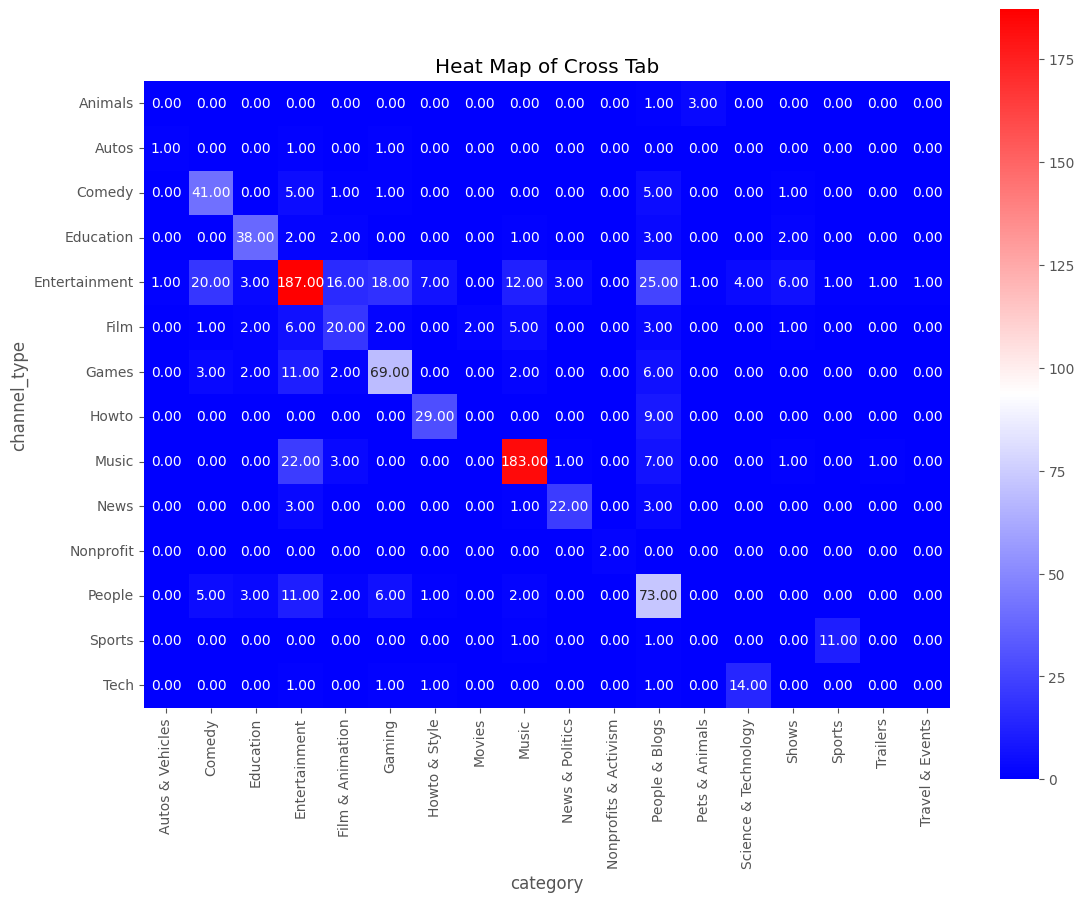

In [16]:
plt.figure(figsize=(13,10))
sns.heatmap(cross_tab, annot=True, fmt='.2f', cmap='bwr', square=True)
plt.title('Heat Map of Cross Tab')
plt.show()

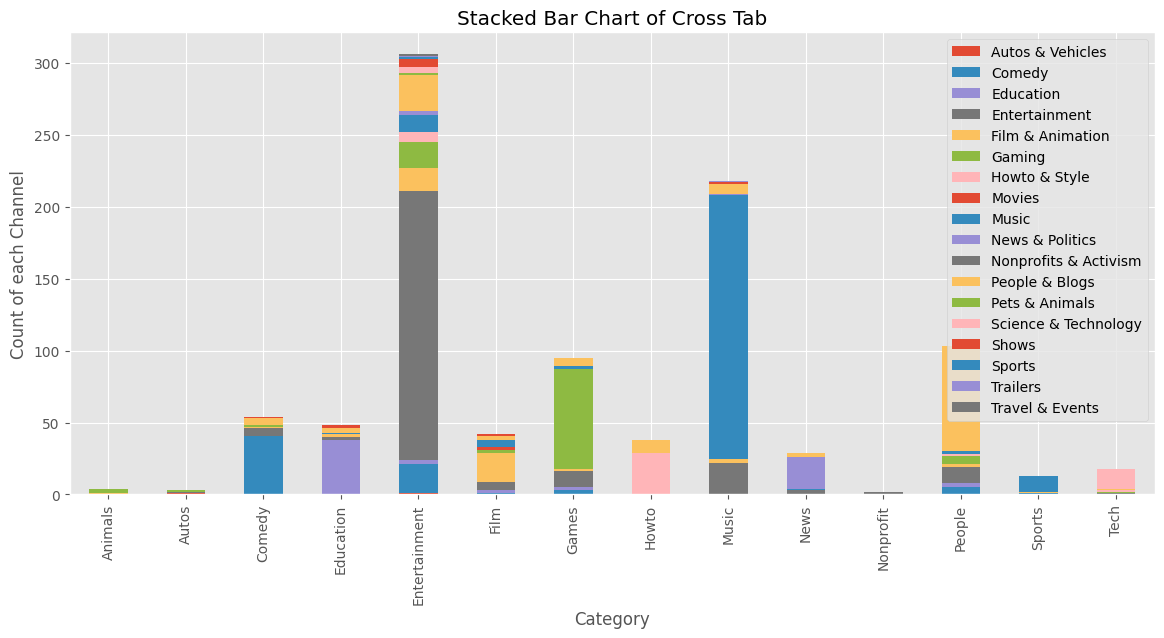

In [17]:
cross_tab.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.xlabel('Category')
plt.ylabel('Count of each Channel')
plt.title('Stacked Bar Chart of Cross Tab')
plt.legend(loc='best')
plt.show()

---

### 6. Is there a correlation between the number of subscribers and total video views for YouTube channels?

In [18]:
corr = df[['subscribers', 'video views']].corr().iloc[0, 1]
corr

0.8169842426182249

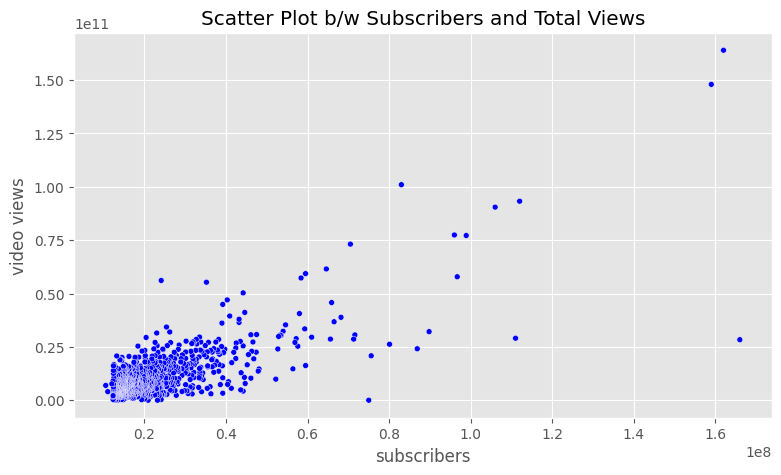

In [19]:
plt.figure(figsize=(9, 5))
sns.scatterplot(df.loc[1:], x='subscribers', y='video views', color='blue', 
                size=1, legend=False)

plt.title('Scatter Plot b/w Subscribers and Total Views')
plt.show()

---

### 7. How do the monthly earnings vary throughout different categories?

In [20]:
df.groupby('category')['lowest_monthly_earnings'].mean()

category
Autos & Vehicles          68300.000000
Comedy                    41269.428571
Education                 43902.270833
Entertainment             39194.317269
Film & Animation          45989.434783
Gaming                    19891.500000
Howto & Style             12305.105263
Movies                    28400.000000
Music                     34600.743961
News & Politics           40192.615385
Nonprofits & Activism     24400.000000
People & Blogs            44016.766423
Pets & Animals            49975.500000
Science & Technology      12255.666667
Shows                    145354.545455
Sports                    55858.333333
Trailers                  22600.000000
Travel & Events            7800.000000
Name: lowest_monthly_earnings, dtype: float64

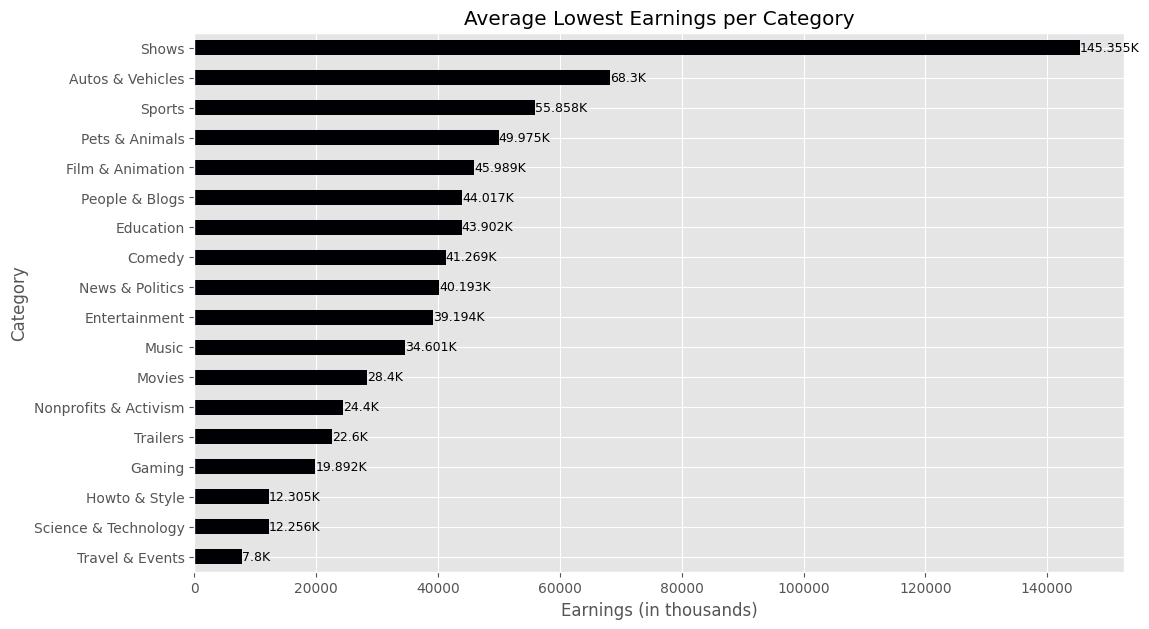

In [21]:
df.groupby('category')['lowest_monthly_earnings'].mean().sort_values().plot(kind='barh', 
                                                                            title='Average Lowest Earnings per Category', 
                                                                            colormap='inferno', 
                                                                            figsize=(12,7))

for i,j in enumerate(df.groupby('category')['lowest_monthly_earnings'].mean().sort_values(ascending=False)):
    plt.text(j, 17-i, f"{round(j/1000, 3)}K", va='center', fontsize=9, color='black')

plt.xlabel('Earnings (in thousands)')
plt.ylabel('Category')
plt.show()

In [22]:
df.groupby('category')['highest_monthly_earnings'].mean()

category
Autos & Vehicles         1.086350e+06
Comedy                   6.587649e+05
Education                7.034188e+05
Entertainment            6.260108e+05
Film & Animation         7.359757e+05
Gaming                   3.192845e+05
Howto & Style            1.965648e+05
Movies                   4.547000e+05
Music                    5.524842e+05
News & Politics          6.426320e+05
Nonprofits & Activism    3.904000e+05
People & Blogs           7.044082e+05
Pets & Animals           7.944322e+05
Science & Technology     1.959353e+05
Shows                    2.333182e+06
Sports                   8.980250e+05
Trailers                 3.619000e+05
Travel & Events          1.240000e+05
Name: highest_monthly_earnings, dtype: float64

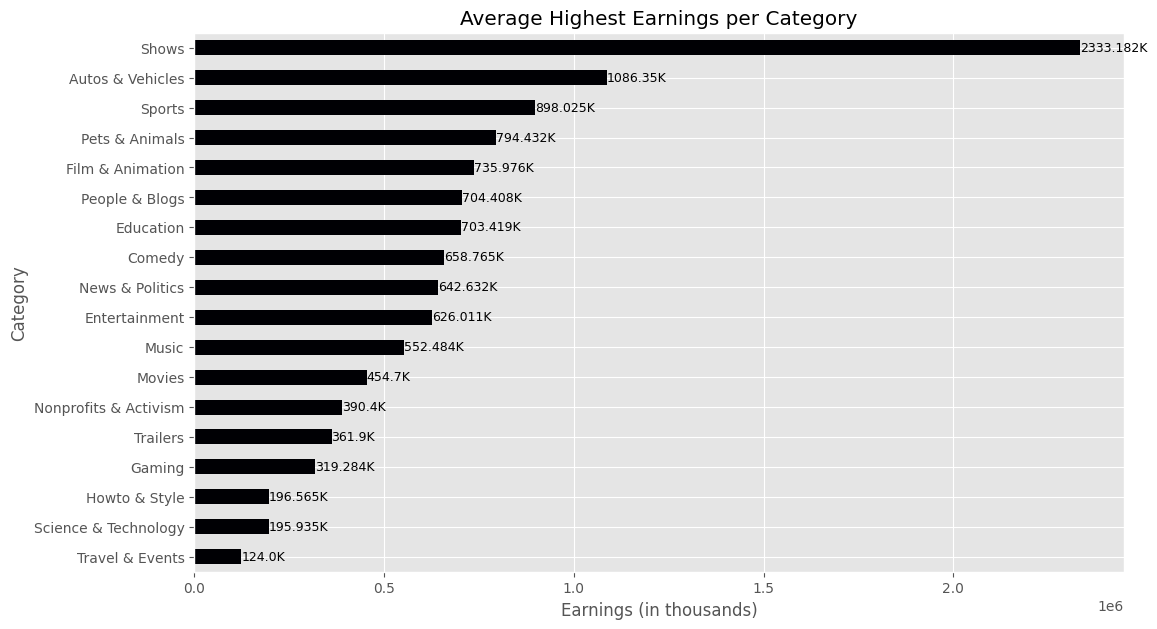

In [23]:
df.groupby('category')['highest_monthly_earnings'].mean().sort_values().plot(kind='barh', 
                                                                             title='Average Highest Earnings per Category', 
                                                                             colormap='inferno', 
                                                                             figsize=(12,7))

for i,j in enumerate(df.groupby('category')['highest_monthly_earnings'].mean().sort_values(ascending=False)):
    plt.text(j, 17-i, f"{round(j/1000, 3)}K", va='center', fontsize=9, color='black')

plt.xlabel('Earnings (in thousands)')
plt.ylabel('Category')
plt.show()